**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: ---Juan Carlos de Jesús Garcés Carrillo------------------------------------------------------
*   MATRÍCULA: -A01796283---------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia de datos/Semana8"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1b) Búsqueda de valores faltantes.

In [7]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

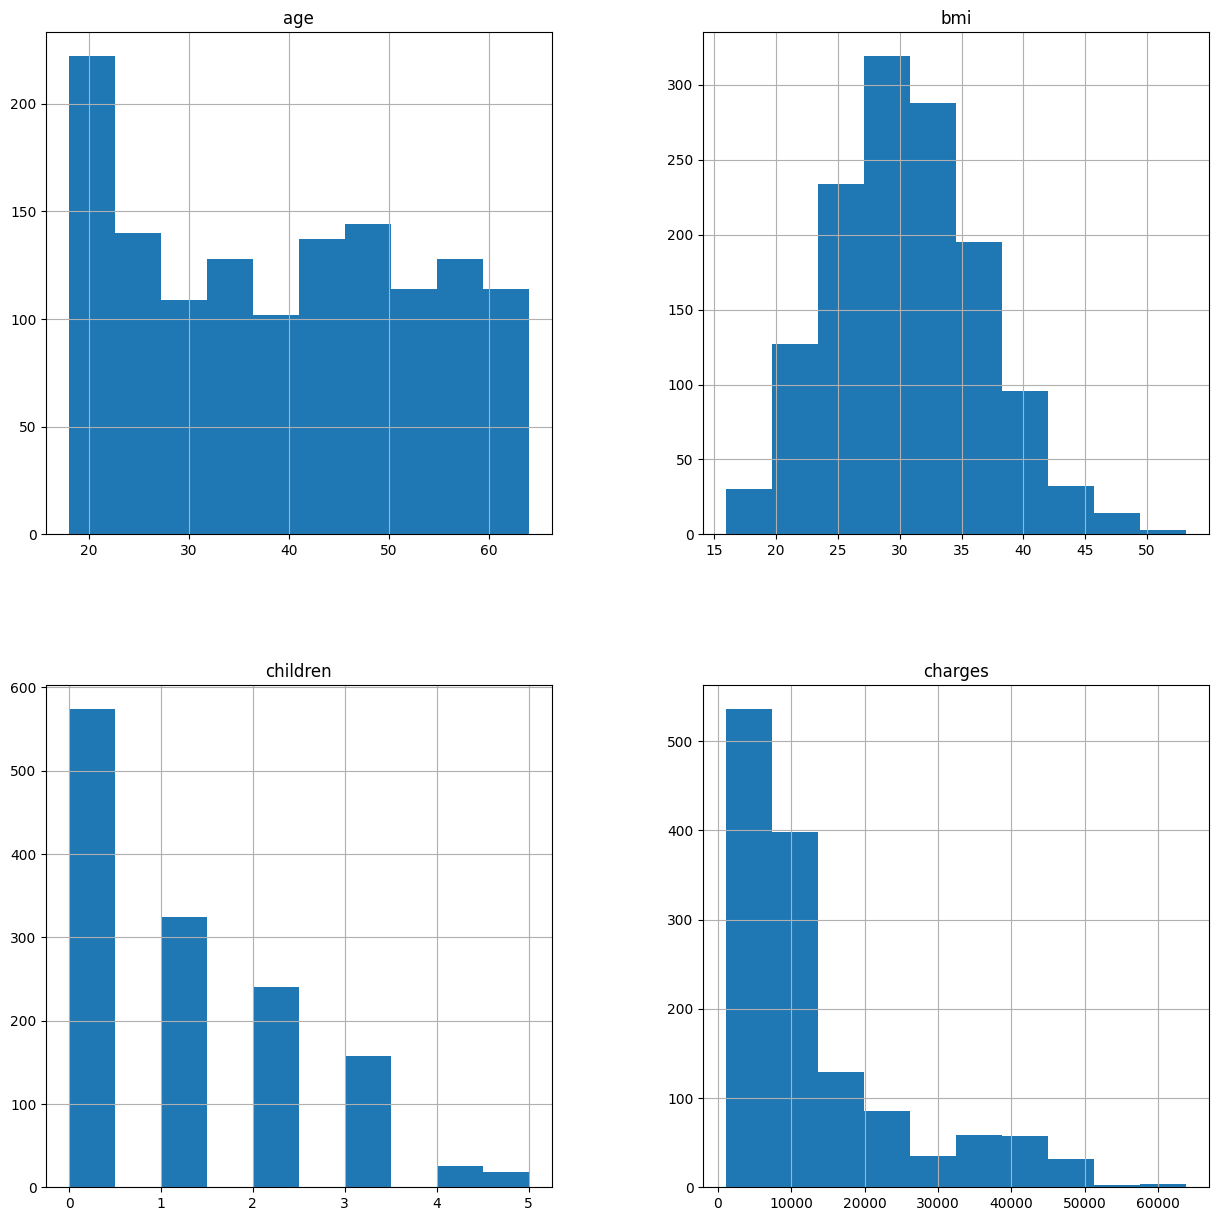

In [8]:
numerical=insurance_df.select_dtypes(include=['int64','float64'])
numerical.hist(figsize=(15,15))

<Axes: >

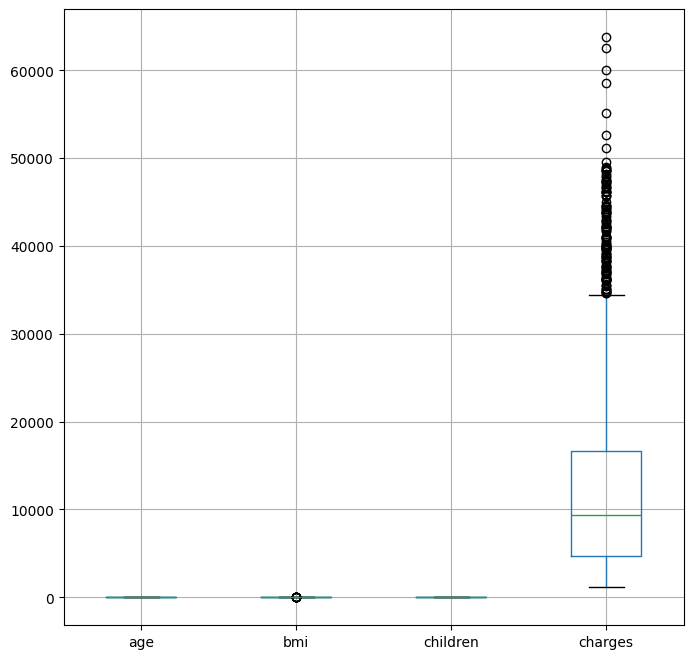

In [9]:
numerical.boxplot(figsize=(8,8))

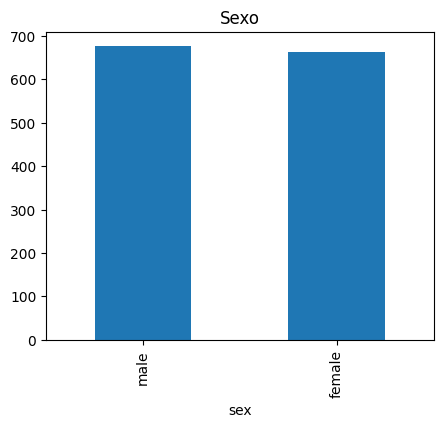

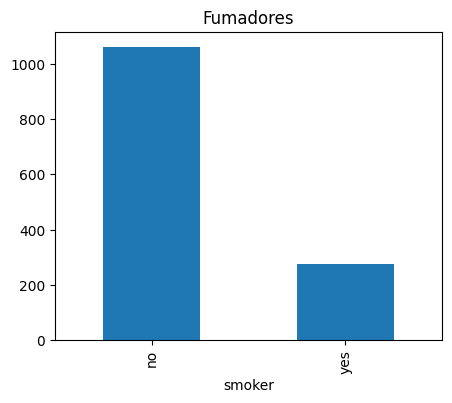

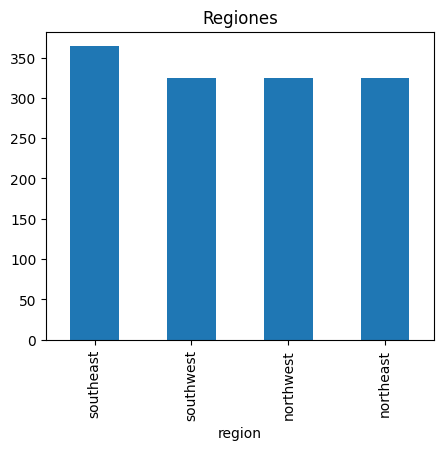

In [10]:
categorical=insurance_df.select_dtypes(include=['object'])
categorical.columns

plt.figure(figsize=(5,4))
categorical['sex'].value_counts().plot(kind='bar')
plt.title('Sexo')
plt.show()

plt.figure(figsize=(5,4))
categorical['smoker'].value_counts().plot(kind='bar')
plt.title('Fumadores')
plt.show()

plt.figure(figsize=(5,4))
categorical['region'].value_counts().plot(kind='bar')
plt.title('Regiones')
plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

<Axes: title={'center': 'charges'}, xlabel='[sex]'>

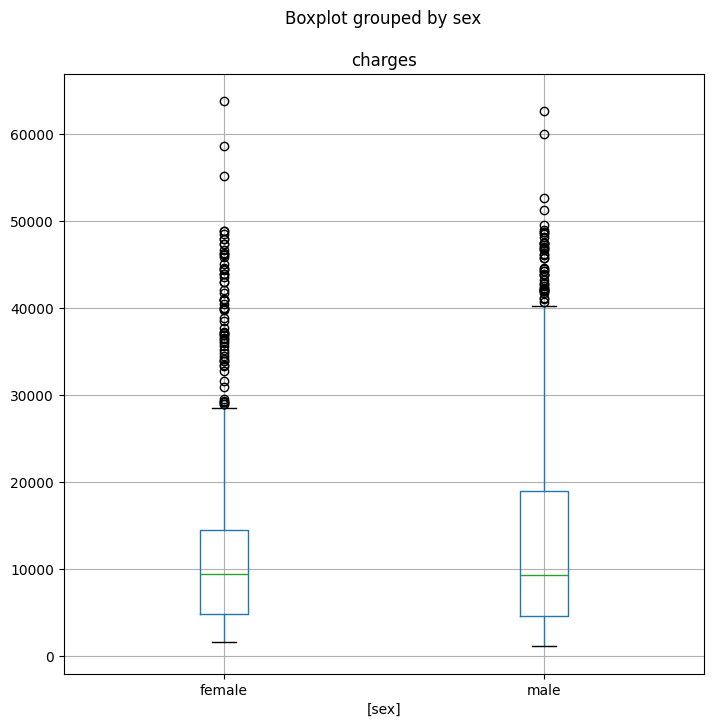

In [11]:
sexcharge=insurance_df.loc[:,['sex','charges']]
sexcharge
sexcharge.boxplot(by='sex',figsize=(8,8))


Se puede ver en el gráfico que las primas de los hombres son considerablemente mayores que las de las mujeres.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

<Axes: xlabel='bmi', ylabel='charges'>

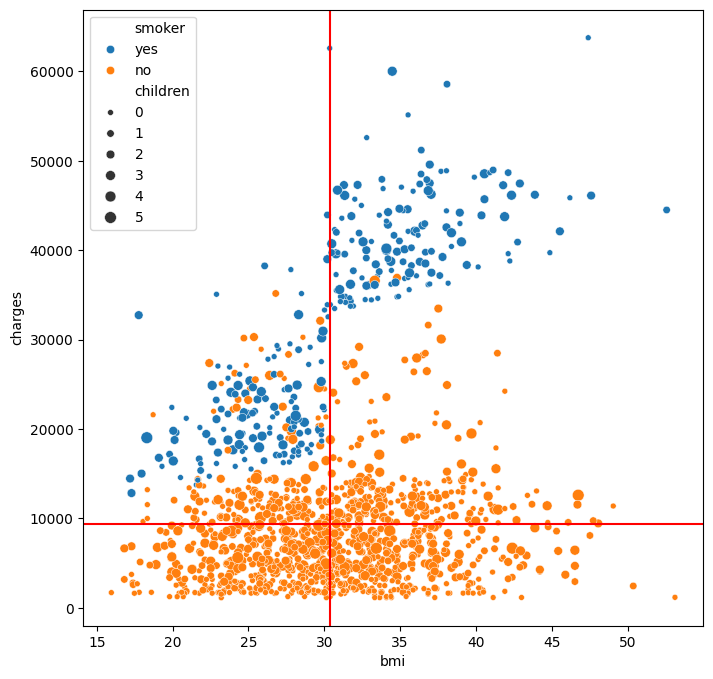

In [12]:
df=insurance_df.loc[:,['charges','bmi','smoker','children']]
df

max_x=(df['bmi'].median())
max_y=(df['charges'].median())


plt.figure(figsize=(8,8))
plt.axhline(y=max_y, color='r', linestyle='-')
plt.axvline(x=max_x, color='r', linestyle='-')
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',size='children')


Se pueden obtener conclusiones importantes a partir de este gráfico, la densidad poblacional que menos paga por su seguro, son los no fumadores lo que es muy claro, los fumares que tienen un bmi por debajo de la media pagan más que los no fumadores sin importar el bmi, a diferencia de los fumadores con bmi por encima de la media ya que para ellos el costo mínimo del seguro es de +$30k y son los que más pagan de todos.
El número de hijos no parece afectar el costo del seguro

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

In [13]:
df_numerical=insurance_df.select_dtypes(include=['int64','float64'])
df_numerical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

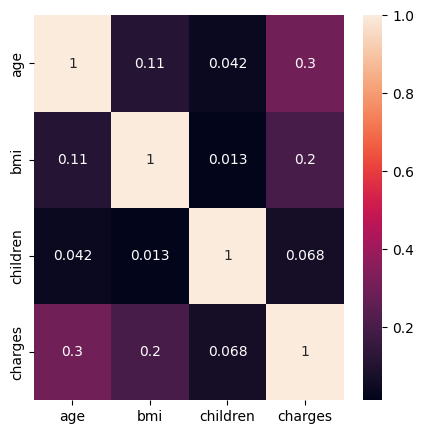

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df_numerical.corr(),annot=True,cmap="rocket")

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [15]:
df_charges=insurance_df.loc[:,['age','bmi','charges','smoker','sex']]
df_charges

q1=df_charges['charges'].quantile(0.25)
q3=df_charges['charges'].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers=df_charges[(df_charges['charges']<lower_bound) | (df_charges['charges']>upper_bound)]
print(outliers)

age_promedio,bmi_promedio =outliers['age'].mean(),outliers['bmi'].mean()

print("El promedio de age en los outliers de charge es: ",age_promedio)
print("El promedio de bmi en los outliers de charge es: ",bmi_promedio)

      age     bmi      charges smoker     sex
14     27  42.130  39611.75770    yes    male
19     30  35.300  36837.46700    yes    male
23     34  31.920  37701.87680    yes  female
29     31  36.300  38711.00000    yes    male
30     22  35.600  35585.57600    yes    male
...   ...     ...          ...    ...     ...
1300   45  30.360  62592.87309    yes    male
1301   62  30.875  46718.16325    yes    male
1303   43  27.800  37829.72420    yes    male
1313   19  34.700  36397.57600    yes  female
1323   42  40.370  43896.37630    yes  female

[139 rows x 5 columns]
El promedio de age en los outliers de charge es:  41.07913669064748
El promedio de bmi en los outliers de charge es:  35.564604316546756


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

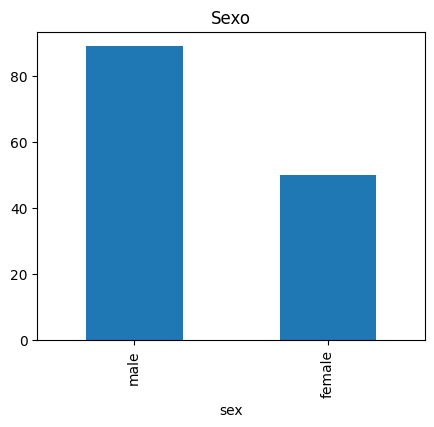

In [16]:
plt.figure(figsize=(5,4))
outliers['sex'].value_counts().plot(kind='bar')
plt.title('Sexo')
plt.show()

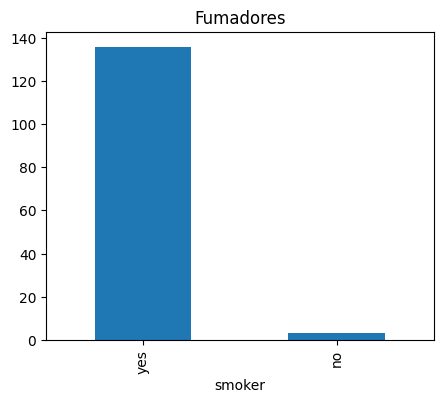

In [17]:
plt.figure(figsize=(5,4))
outliers['smoker'].value_counts().plot(kind='bar')
plt.title('Fumadores')
plt.show()

In [18]:
perc_male=outliers[outliers['sex']=='male'].shape[0]/outliers.shape[0]*100
perc_female=outliers[outliers['sex']=='female'].shape[0]/outliers.shape[0]*100
perc_smoker=outliers[outliers['smoker']=='yes'].shape[0]/outliers.shape[0]*100
perc_nonsmoker=outliers[outliers['smoker']=='no'].shape[0]/outliers.shape[0]*100

print("El porcentaje de hombres en los outliers de charge es: ",perc_male)
print("El porcentaje de mujeres en los outliers de charge es: ",perc_female)
print("El porcentaje de fumadores en los outliers de charge es: ",perc_smoker)
print("El porcentaje de no fumadores en los outliers de charge es: ",perc_nonsmoker)

El porcentaje de hombres en los outliers de charge es:  64.02877697841727
El porcentaje de mujeres en los outliers de charge es:  35.97122302158273
El porcentaje de fumadores en los outliers de charge es:  97.84172661870504
El porcentaje de no fumadores en los outliers de charge es:  2.158273381294964


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('charges~age+sex+bmi+children+smoker+region',data=insurance_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
sex,5.716429e+06,1.0,0.155553,6.933475e-01
smoker,1.224468e+11,1.0,3331.968045,0.000000e+00
region,2.334312e+08,3.0,2.117343,9.622108e-02
age,1.712447e+10,1.0,465.983684,7.783217e-89
bmi,5.169225e+09,1.0,140.662697,6.498194e-31
children,4.375466e+08,1.0,11.906327,5.769682e-04
Residual,4.883953e+10,1329.0,NaN,NaN


In [20]:
x=insurance_df.loc[:,['age','sex','bmi','children','smoker','region']]
y=insurance_df.loc[:,['charges']]

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [21]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1, stratify=x['smoker'])

In [22]:
Xtest["smoker"].value_counts() / len(Xtest)

,count
smoker,
no,0.794776
yes,0.205224


In [23]:
print(ytrain.count()/y.count())
print(ytest.count()/y.count())

charges    0.799701
dtype: float64
charges    0.200299
dtype: float64


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']


preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [25]:
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

lr_model=LinearRegression()

pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('lr_model',lr_model)
])

pipeline.fit(Xtrain,ytrain)

y_pred=pipeline.predict(Xtest)

rmse=np.sqrt(np.mean((ytest-y_pred)**2))
r2=r2_score(ytest,y_pred)

In [26]:
print("El RMSE del modelo es: ",rmse)
print("El R2 del modelo es: ",r2)


El RMSE del modelo es:  5701.985571239995
El R2 del modelo es:  0.7535759812640819


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [27]:
print(outliers.loc[:,['charges']])

          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]


In [28]:
print(upper_bound)

34489.350562499996


In [29]:
insurance_df2=insurance_df.copy()


In [30]:
insurance_df2.loc[(insurance_df2['charges'] < lower_bound) | (insurance_df2['charges'] > upper_bound), 'charges'] = upper_bound

In [31]:
insurance_df2.loc[insurance_df2['charges']==upper_bound]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,34489.350562
19,30,male,35.300,0,yes,southwest,34489.350562
23,34,female,31.920,1,yes,northeast,34489.350562
29,31,male,36.300,2,yes,southwest,34489.350562
30,22,male,35.600,0,yes,southwest,34489.350562
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,34489.350562
1301,62,male,30.875,3,yes,northwest,34489.350562
1303,43,male,27.800,0,yes,southwest,34489.350562
1313,19,female,34.700,2,yes,southwest,34489.350562


In [32]:
x2=insurance_df2.loc[:,['age','sex','bmi','children','smoker','region']]
y2=insurance_df2.loc[:,['charges']]

In [33]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.2, random_state=1, stratify=x['smoker'])

In [34]:
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']


preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [35]:
lr_model2=LinearRegression()

pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('lr_model',lr_model2)
])

pipeline.fit(Xtrain2,ytrain2)

y_pred2=pipeline.predict(Xtest2)

rmse=np.sqrt(np.mean((ytest2-y_pred2)**2))
r2=r2_score(ytest2,y_pred2)

In [36]:
print("El RMSE del modelo es: ",rmse)
print("El R2 del modelo es: ",r2)

El RMSE del modelo es:  4814.446842410666
El R2 del modelo es:  0.7635434096327061


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [37]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Create preprocessing2 transformer
preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ])


lr_model3 = LinearRegression()
pipeline2 = Pipeline([
    ('preprocessing2', preprocessing2),
    ('lr_model3', lr_model3)
])


x2 = insurance_df2.loc[:,['age','sex','bmi','children','smoker','region']]
y2 = insurance_df2.loc[:,['charges']]

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.2, random_state=1, stratify=x2['smoker'])

pipeline2.fit(Xtrain2, ytrain2)

y_pred2 = pipeline2.predict(Xtest2)

rmse2 = np.sqrt(np.mean((ytest2 - y_pred2)**2))
r2_2 = r2_score(ytest2, y_pred2)

print("El RMSE del modelo lr_model3 es: ", rmse2)
print("El R2 del modelo lr_model3 es: ", r2_2)

El RMSE del modelo lr_model3 es:  4811.600670456455
El R2 del modelo lr_model3 es:  0.7638229005936741


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [43]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=5) # Cambiar grados aqui
X_train_poly = poly.fit_transform(preprocessing2.fit_transform(Xtrain2))
X_test_poly = poly.transform(preprocessing2.transform(Xtest2))


lr_model4 = LinearRegression()
lr_model4.fit(X_train_poly, ytrain2)


y_pred_poly = lr_model4.predict(X_test_poly)


rmse_poly = np.sqrt(np.mean((ytest2 - y_pred_poly)**2))
r2_poly = r2_score(ytest2, y_pred_poly)

print("El RMSE del modelo lr_model4 (polinomial) es:", rmse_poly)
print("El R2 del modelo lr_model4 (polinomial) es:", r2_poly)

El RMSE del modelo lr_model4 (polinomial) es: 7789.244196764134
El R2 del modelo lr_model4 (polinomial) es: 0.3810589748635398
